In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import Accuracy
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.losses import SparseCategoricalCrossentropy

In [2]:
index = [f'col-{i}' for i in range(785)]

data = pd.read_csv('A_Z Handwritten Data.csv', names=index)

data.head()

,col-0,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,...,col-775,col-776,col-777,col-778,col-779,col-780,col-781,col-782,col-783,col-784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.describe()

,col-0,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,...,col-775,col-776,col-777,col-778,col-779,col-780,col-781,col-782,col-783,col-784
count,372451.000000,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,372451.0,...,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000,372451.000000
mean,13.523454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419179,0.385566,0.319820,0.208941,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [4]:
features = data.loc[:, 'col-1':].to_numpy()
target = data['col-0'].to_numpy()

In [5]:
features.shape

(372451, 784)

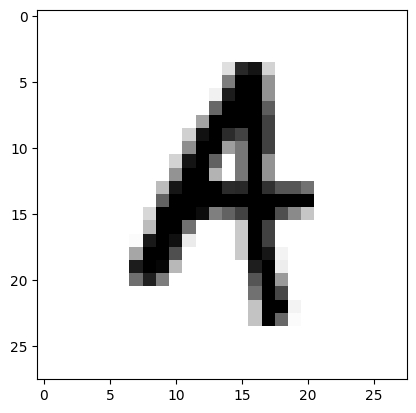

In [6]:
plt.imshow(features[0].reshape((28, 28)), cmap="gray_r")

In [7]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

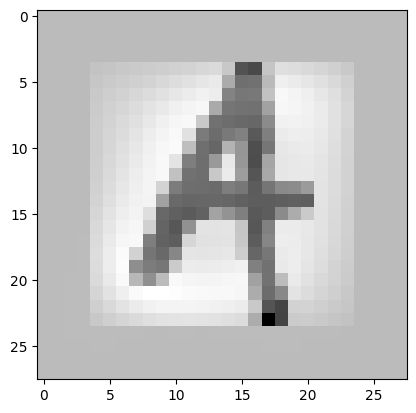

In [8]:
plt.imshow(features_scaled[0].reshape(28, 28), cmap="gray_r")

In [9]:
X_train, X_test = train_test_split(features_scaled, test_size = 0.2, random_state = 2)
y_train, y_test = train_test_split(target, test_size = 0.2, random_state = 2)

In [10]:
model = Sequential([
    Input(shape=(784, )),
    Dense(units=784, activation='relu'),
    Dense(units=1000, activation='relu'),
    Dense(units=600, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=26, activation='softmax')
])

model.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 600)                 │         600,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │         120,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 26)                  │           5,226 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,126,466 (8.11 MB)

 Trainable params: 2,126,466 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
)

In [15]:
history = model.fit(X_train, y_train, batch_size=200, epochs=50)

Epoch 1/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - loss: 0.0335
Epoch 2/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - loss: 0.0414
Epoch 3/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - loss: 0.0315
Epoch 4/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 70s 47ms/step - loss: 0.0328
Epoch 5/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - loss: 0.0387
Epoch 6/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 72s 49ms/step - loss: 0.0337
Epoch 7/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - loss: 0.0241
Epoch 8/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 74s 50ms/step - loss: 0.0420
Epoch 9/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 76s 51ms/step - loss: 0.0306
Epoch 10/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - loss: 0.0393
Epoch 11/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 75s 51ms/step - loss: 0.0312
Epoch 12/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 76s 51ms/step - loss: 0.0368
Epoch 13/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - loss: 0.0441
Epoch 14/50
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - loss: 0.0448
E

In [17]:
MODEL_PATH = './saved_model/HandWritten_Letters_Regonizer.keras'
import os

model.save(MODEL_PATH)

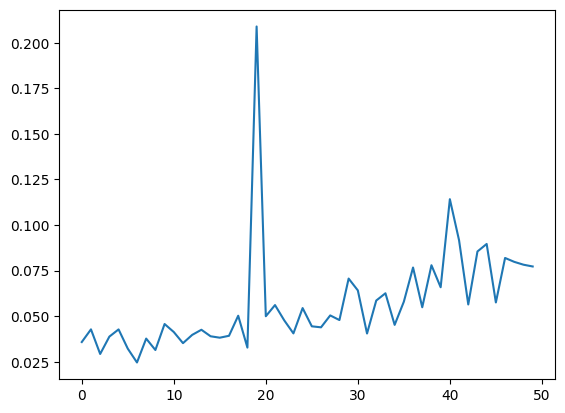

In [22]:
plt.plot(history.history['loss'])

In [23]:
predictions = model.predict(X_test)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step


In [32]:
predictions.shape

(74491, 26)

In [33]:
classification = np.zeros(predictions.shape[0])
for i in range(predictions.shape[0]):
    classification[i] = np.where(predictions[i] == np.max(predictions[i]))[0]

classification

C:\Users\ayman\AppData\Local\Temp\ipykernel_5628\242301980.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification[i] = np.where(predictions[i] == np.max(predictions[i]))[0]


array([18., 20., 14., ..., 20., 18.,  0.])

In [35]:
y_test

array([18, 20, 14, ..., 20, 18,  0], dtype=int64)

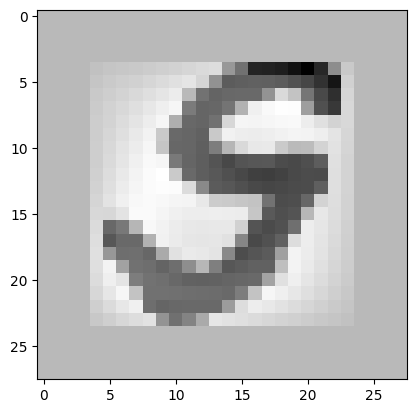

In [34]:
plt.imshow(X_test[0].reshape(28, 28), cmap="gray_r")

In [46]:
acc = Accuracy()
acc.update_state(classification, y_test)
acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.97245306>